#### NEED TO FIX COUTER PART TO FIND IF CLUSTERING ALGS ARE OVERFITTING OT NOT


In [68]:
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from collections import Counter


### Clustering methods

In [2]:
def get_clustering_output(data, labels, model_name):
    # Output
    print(f'Silhouette Score ({model_name}): {silhouette_score(data, labels)}')

In [64]:
def count_clusters_items(list):
    cluster_ids = Counter(list).keys() 
    cluster_items_count = Counter(list).values()
    return cluster_ids, cluster_items_count

In [66]:
def run_clustering(data , kmeans=5 , eps=0.3, min_samples=2, k_agg=5, affinity='euclidean', gm_n_components=5):

    # dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    # print('labels',  dbscan_model.labels_)
    # get_clustering_output(data, dbscan_model.labels_, 'DB-Scan')

    kmeans = KMeans(n_clusters=kmeans).fit(data)
    count_clusters_items(kmeans.labels_)
    get_clustering_output(data, kmeans.labels_, 'K-means')
    
    hierarchical = AgglomerativeClustering(n_clusters=k_agg, affinity=affinity).fit(data)
    count_clusters_items(hierarchical.labels_)
    get_clustering_output(data, hierarchical.labels_, 'Hierarchical')

    gm = GaussianMixture(n_components=gm_n_components, random_state=0).fit(data)
    count_clusters_items(gm.predict(data))
    get_clustering_output(data, gm.predict(data), 'Gaussian Mixture')
    

## Load Data

In [29]:
df = pd.read_csv('datasets/csv_result-Date_Fruit_Datasets.csv', header=None)
df


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       898 non-null    int64  
 1   1       898 non-null    float64
 2   2       898 non-null    float64
 3   3       898 non-null    float64
 4   4       898 non-null    float64
 5   5       898 non-null    float64
 6   6       898 non-null    float64
 7   7       898 non-null    int64  
 8   8       898 non-null    float64
 9   9       898 non-null    float64
 10  10      898 non-null    float64
 11  11      898 non-null    float64
 12  12      898 non-null    float64
 13  13      898 non-null    float64
 14  14      898 non-null    float64
 15  15      898 non-null    float64
 16  16      898 non-null    float64
 17  17      898 non-null    float64
 18  18      898 non-null    float64
 19  19      898 non-null    float64
 20  20      898 non-null    float64
 21  21      898 non-null    float64
 22  22

### dataset has 7 classes

In [31]:
df.iloc[:,-1].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

### Remove last column (label)

In [32]:
df = df.iloc[:,:-1]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       898 non-null    int64  
 1   1       898 non-null    float64
 2   2       898 non-null    float64
 3   3       898 non-null    float64
 4   4       898 non-null    float64
 5   5       898 non-null    float64
 6   6       898 non-null    float64
 7   7       898 non-null    int64  
 8   8       898 non-null    float64
 9   9       898 non-null    float64
 10  10      898 non-null    float64
 11  11      898 non-null    float64
 12  12      898 non-null    float64
 13  13      898 non-null    float64
 14  14      898 non-null    float64
 15  15      898 non-null    float64
 16  16      898 non-null    float64
 17  17      898 non-null    float64
 18  18      898 non-null    float64
 19  19      898 non-null    float64
 20  20      898 non-null    float64
 21  21      898 non-null    float64
 22  22

In [34]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


### Feature scaling

- standarization

In [35]:
standarized_data = df.copy()
scaler = preprocessing.StandardScaler().fit(standarized_data)
standarized_data = pd.DataFrame(scaler.transform(standarized_data), columns=df.columns)
standarized_data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.155640,0.783942,0.604507,1.311643,-1.129568,1.075704,0.708628,1.108752,0.871873,-0.046797,...,0.555487,-0.349683,-0.575281,0.218565,-1.342811,-1.267269,-0.822728,0.538340,0.435593,-0.023908
1,0.371700,0.067067,-0.187473,0.869789,-1.899771,0.431437,0.857410,0.323373,0.804852,-0.051373,...,0.257494,-0.562154,-0.661407,-0.298009,-0.117030,-0.493225,-0.253422,-0.003550,0.284113,-0.024694
2,2.132265,1.439131,1.319121,1.921899,-0.993119,1.794103,0.791285,2.069149,0.547942,-0.045820,...,1.055673,-0.171667,-0.333868,0.457986,-3.049848,-2.670541,-2.197277,0.958897,0.742335,0.355243
3,1.098729,0.716350,0.535970,1.308399,-1.250230,1.031228,0.714138,1.051992,0.737832,-0.047612,...,2.453948,0.274066,0.935707,2.187189,-0.011006,-0.177706,-0.125142,-0.416894,-0.331475,-0.639369
4,0.459641,0.250603,0.091511,0.761463,-1.025822,0.507425,0.493720,0.431717,0.384115,-0.046056,...,1.005402,-0.534895,-0.570286,0.309306,-0.399329,-0.406627,0.143293,0.167646,0.148910,-0.502579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.400168,-0.322843,-0.409550,-0.163681,-0.150746,-0.287167,-0.184067,-0.393707,-0.174385,-0.038246,...,-0.617040,-0.693781,-0.732092,-0.517759,0.321879,0.575335,0.623293,-0.062039,-0.408235,-0.525831
894,0.630951,1.481663,0.726851,0.487472,0.303708,0.652548,-1.941903,0.760612,-1.242983,-0.032570,...,0.490988,-0.289526,-0.408827,0.102540,0.012032,0.413157,0.569055,-0.203952,-0.687141,-1.068502
895,-0.410179,-0.319497,-0.023043,-0.527567,0.847247,-0.297199,0.587398,-0.437594,-0.228374,-0.023312,...,0.025265,-0.682158,-0.695066,-0.530011,0.471853,0.550449,0.682703,-0.370644,-0.567152,-0.658919
896,-0.553622,-0.369446,-0.237281,-0.473210,0.561945,-0.443347,-1.181460,-0.506189,-0.760811,-0.028584,...,0.445775,-0.543439,-0.647409,-0.479247,0.284936,0.450864,0.533185,0.071247,-0.218832,-0.228759


- Robust scaler

In [36]:
r_s_data = df.copy()
transformer = RobustScaler().fit(r_s_data)
r_s_data = pd.DataFrame(transformer.transform(r_s_data), columns=df.columns)
r_s_data


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.582662,0.275099,0.213660,0.817015,-1.007509,0.514659,0.570328,0.543799,0.516613,-0.752595,...,0.589645,0.087392,-0.035415,0.672978,-1.041768,-0.995490,-0.839899,0.196635,0.220736,-0.101866
1,0.104216,-0.167567,-0.310452,0.543281,-1.593649,0.097531,0.778420,0.066042,0.465166,-1.023337,...,0.351309,-0.233637,-0.102420,0.052584,-0.201131,-0.457142,-0.396420,-0.153606,0.118504,-0.102354
2,1.178705,0.679674,0.686574,1.195075,-0.903669,0.979784,0.685934,1.128021,0.267953,-0.694793,...,0.989695,0.356362,0.152404,0.960518,-2.212450,-1.971468,-1.910647,0.468454,0.427753,0.133424
3,0.547929,0.233362,0.168304,0.815005,-1.099335,0.485863,0.578035,0.509270,0.413719,-0.800764,...,2.108041,1.029832,1.140132,3.037254,-0.128420,-0.237699,-0.296493,-0.420763,-0.296949,-0.483804
4,0.157888,-0.054235,-0.125828,0.476172,-0.928556,0.146729,0.269750,0.131949,0.142194,-0.708745,...,0.949488,-0.192450,-0.031528,0.781956,-0.394731,-0.396913,-0.087387,-0.042957,0.027257,-0.398916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.366861,-0.408334,-0.457418,-0.096965,-0.262605,-0.367727,-0.678227,-0.370167,-0.286531,-0.246657,...,-0.348148,-0.432516,-0.157413,-0.211332,0.099871,0.286042,0.286524,-0.191409,-0.348753,-0.413345
894,0.262440,0.705937,0.294624,0.306432,0.083244,0.240688,-3.136802,0.332020,-1.106824,0.089195,...,0.538058,0.178285,0.094086,0.533634,-0.112620,0.173247,0.244274,-0.283132,-0.536984,-0.750111
895,-0.372971,-0.406268,-0.201637,-0.322397,0.496889,-0.374222,0.400771,-0.396865,-0.327974,0.636990,...,0.165571,-0.414954,-0.128607,-0.226046,0.202724,0.268734,0.332803,-0.390870,-0.456005,-0.495936
896,-0.460515,-0.437111,-0.343414,-0.288722,0.279768,-0.468845,-2.073218,-0.438592,-0.736692,0.325056,...,0.501897,-0.205360,-0.091530,-0.165079,0.074537,0.199472,0.216331,-0.105262,-0.220928,-0.228991


- min max range scaling (normalization?)

In [37]:
min_max_data = df.copy()
min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = pd.DataFrame(min_max_scaler.fit_transform(min_max_data), columns=df.columns)
min_max_data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.465773,0.533393,0.400815,0.621454,0.578907,0.663606,0.882463,0.470201,0.624019,0.000720,...,0.215776,0.021833,0.030355,0.031264,0.769330,0.797879,0.792768,0.524396,0.360048,0.390293
894,0.668908,0.922547,0.585486,0.718768,0.640415,0.806960,0.684080,0.698311,0.457110,0.000909,...,0.385840,0.069603,0.078511,0.072954,0.711430,0.767717,0.783525,0.489149,0.297087,0.277447
895,0.463801,0.534115,0.463625,0.567071,0.713980,0.662076,0.969527,0.461528,0.615586,0.001217,...,0.314359,0.023207,0.035871,0.030441,0.797356,0.793251,0.802894,0.447747,0.324174,0.362618
896,0.435542,0.523343,0.428810,0.575194,0.675366,0.639781,0.769900,0.447973,0.532422,0.001042,...,0.378900,0.039599,0.042970,0.033852,0.762427,0.774730,0.777411,0.557500,0.402805,0.452067


### Find best k before PCA

In [38]:
from yellowbrick.cluster import KElbowVisualizer

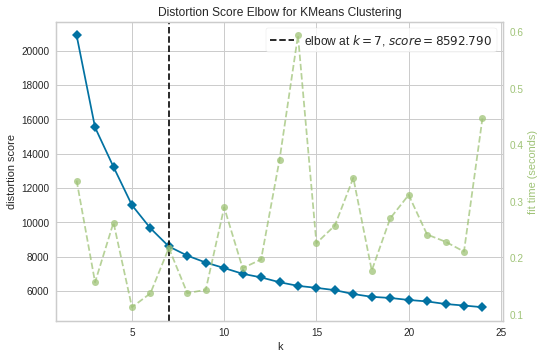

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
vis = KElbowVisualizer(KMeans(), k=(2,25)).fit(standarized_data)
vis.show()

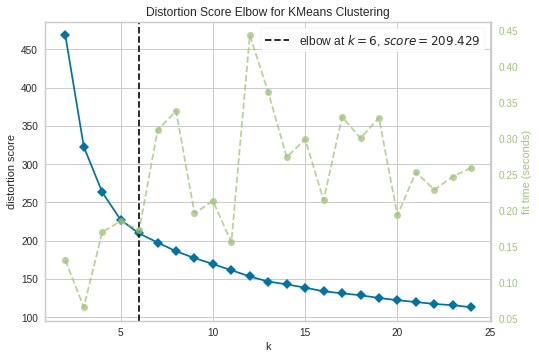

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
vis = KElbowVisualizer(KMeans(), k=(2,25)).fit(min_max_data)
vis.show()

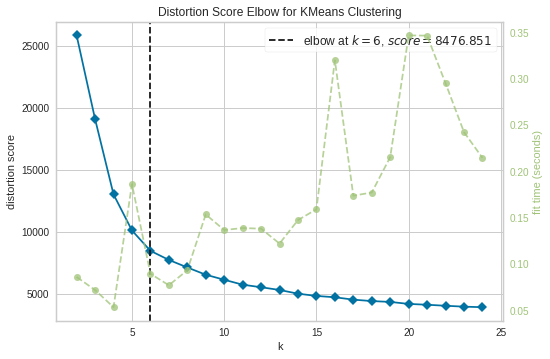

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
vis = KElbowVisualizer(KMeans(), k=(2,25)).fit(r_s_data)
vis.show()

### Apply clustering before PCA with k=6

In [67]:
run_clustering(df, kmeans=6, eps=0.8, gm_n_components=6, k_agg=6)

NameError: name 'Counter' is not defined

### Test PCA with different coponents

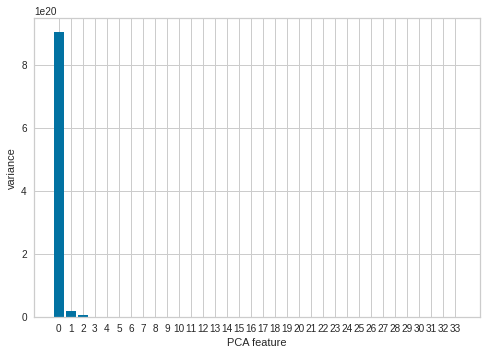

In [53]:
model = PCA()
pca_df = model.fit(df)
features = range(pca_df.n_components_)
plt.bar(features, model.explained_variance_ )
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Apply PCA

In [54]:
def apply_pca(n_components, data):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components, columns =[f'p_c{i}' for i in range(n_components)])
    return principal_df

In [55]:
len(df.columns)

34

#### Find best k for PCA output

##### PCA n_components = 30  -> No change

In [56]:
p_df = apply_pca(30, df)
run_clustering(p_df, kmeans=6, eps=0.8, gm_n_components=6, k_agg=6)

labels [5 2 4 2 2 2 1 2 4 1 5 5 2 2 1 5 2 3 2 5 2 2 3 3 2 3 2 5 3 2 2 3 2 5 1 5 3
 2 5 2 5 1 5 2 2 5 2 2 5 2 3 3 3 5 5 5 5 2 5 3 2 3 5 5 2 5 3 3 5 2 5 5 2 2
 2 5 2 5 5 2 5 5 2 1 5 3 2 3 3 5 5 2 2 5 2 5 2 2 2 2 2 3 2 1 5 3 2 2 2 2 2
 5 5 5 5 2 2 2 5 2 3 3 3 2 5 5 3 2 2 2 2 5 3 3 3 3 3 2 2 2 3 2 3 5 2 2 2 3
 2 0 2 3 3 0 3 3 2 3 0 2 3 0 3 0 3 2 3 3 3 0 3 2 3 3 2 3 2 0 0 5 3 3 3 3 0
 3 0 3 0 0 3 3 2 3 0 3 3 2 3 2 2 0 3 3 2 0 3 5 0 2 0 3 0 3 3 3 3 3 3 2 0 3
 2 3 3 3 0 0 3 0 3 0 0 3 3 0 0 0 0 0 0 0 3 3 2 0 3 0 3 3 2 0 3 3 2 3 0 0 0
 0 3 0 2 2 0 2 0 2 3 3 3 3 3 2 3 2 3 3 3 2 2 3 0 0 2 2 3 3 2 2 0 3 3 2 2 3
 2 0 2 3 2 2 3 3 3 3 0 0 3 2 2 5 3 3 3 0 3 2 3 3 2 2 2 0 3 3 0 3 3 3 5 2 2
 3 2 3 3 3 3 2 3 2 3 3 0 3 0 0 2 3 3 0 0 3 3 3 3 2 3 3 2 0 3 2 3 0 2 2 0 3
 3 3 2 0 2 2 3 2 0 2 2 3 2 2 3 2 2 3 3 3 2 2 3 5 2 2 3 3 3 2 2 2 2 5 2 5 3
 2 5 2 2 5 3 2 5 3 2 5 2 2 2 2 2 3 2 3 5 2 2 2 5 2 2 0 2 2 2 2 5 5 1 5 5 1
 5 1 5 1 5 5 5 5 5 1 1 5 4 4 1 5 5 5 1 5 5 5 1 5 5 2 1 1 4 1 4 5 1 5 5 1 5
 5 4 1 1 1 1 1 1 1

##### PCA n_components = 20 -> better gm, lower hier. 

In [57]:
p_df = apply_pca(20, df)
run_clustering(p_df, kmeans=6, eps=0.8, gm_n_components=6, k_agg=6)

labels [3 0 5 0 0 0 1 0 5 1 3 3 0 0 1 3 0 4 0 3 0 0 4 4 0 4 0 3 4 0 0 4 0 3 1 3 4
 0 3 0 3 1 3 0 0 3 0 0 3 0 4 4 4 3 3 3 3 0 3 4 0 4 3 3 0 3 4 4 3 0 3 3 0 0
 0 3 0 3 3 0 3 3 0 1 3 4 0 4 4 3 3 0 0 3 0 3 0 0 0 0 0 4 0 1 3 4 0 0 0 0 0
 3 3 3 3 0 0 0 3 0 4 4 4 0 3 3 4 0 0 0 0 3 4 4 4 4 4 0 0 0 4 0 4 3 0 0 0 4
 0 2 0 4 4 2 4 4 0 4 2 0 4 2 4 2 4 0 4 4 4 2 4 0 4 4 0 4 0 2 2 3 4 4 4 4 2
 4 2 4 2 2 4 4 0 4 2 4 4 0 4 0 0 2 4 4 0 2 4 3 2 0 2 4 2 4 4 4 4 0 4 0 2 4
 0 4 4 4 2 2 4 2 4 2 4 4 4 2 2 2 2 2 2 2 4 4 0 2 4 2 4 4 0 2 4 4 0 4 2 2 2
 2 4 2 0 0 2 0 2 0 4 4 4 4 4 0 4 0 4 4 4 0 0 4 2 2 0 0 4 4 0 0 4 0 4 0 0 4
 0 2 0 4 0 0 4 4 4 4 2 2 4 0 0 3 4 4 4 2 4 0 4 4 0 0 0 2 4 4 2 4 4 4 3 0 0
 4 0 4 4 4 4 0 4 0 4 4 2 4 2 2 0 4 4 2 2 4 4 4 4 0 4 4 0 2 4 0 4 2 0 0 2 4
 4 4 0 2 0 0 4 0 2 0 0 4 0 0 4 0 0 4 4 4 0 0 4 3 0 0 4 4 4 0 0 0 0 3 0 3 4
 0 3 0 0 3 4 0 3 4 0 3 0 0 0 0 0 4 0 4 3 0 0 0 3 0 0 2 0 0 0 0 3 3 1 3 3 1
 3 1 3 1 3 3 3 3 3 1 1 3 5 5 1 3 3 3 1 3 3 3 1 3 3 0 1 1 5 1 5 3 1 3 3 1 3
 3 5 1 1 1 1 1 1 1

##### PCA n_components = 10  -> much lower gm

In [58]:
p_df = apply_pca(10, df)
run_clustering(p_df, kmeans=6, eps=0.8, gm_n_components=6, k_agg=6)

labels [3 5 4 5 5 5 1 5 4 1 3 3 5 5 1 3 5 0 5 3 5 5 0 0 5 0 5 3 0 5 5 0 5 3 1 3 0
 5 3 5 3 1 3 5 5 3 5 5 3 5 0 0 0 3 3 3 3 5 3 0 5 0 3 3 5 3 0 0 3 5 3 3 5 5
 5 3 5 3 3 5 3 3 5 1 3 0 5 0 0 3 3 5 5 3 5 3 5 5 5 5 5 0 5 1 3 0 5 5 5 5 5
 3 3 3 3 5 5 5 3 5 0 0 0 5 3 3 0 5 5 5 5 3 0 0 0 0 0 5 5 5 0 5 0 3 5 5 5 0
 5 2 5 0 0 2 0 0 5 0 2 5 0 2 0 2 0 5 0 0 0 2 0 5 0 0 5 0 5 2 2 3 0 0 0 0 2
 0 2 0 2 2 0 0 5 0 2 0 0 5 0 5 5 2 0 0 5 2 0 3 2 5 2 0 2 0 0 0 0 0 0 5 2 0
 5 0 0 0 2 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 0 0 5 2 0 2 0 0 5 2 0 0 5 0 2 2 2
 2 0 2 5 5 2 5 2 5 0 0 0 0 0 5 0 5 0 0 0 5 5 0 2 2 5 5 0 0 5 5 2 0 0 5 5 0
 5 2 5 0 5 5 0 0 0 0 2 2 0 5 5 3 0 0 0 2 0 5 0 0 5 5 5 2 0 0 2 0 0 0 3 5 5
 0 5 0 0 0 0 5 0 5 0 0 2 0 2 2 5 0 0 2 2 0 0 0 0 5 0 0 5 2 0 5 0 2 5 5 2 0
 0 0 5 2 5 5 0 5 2 5 5 0 5 5 0 5 5 0 0 0 5 5 0 3 5 5 0 0 0 5 5 5 5 3 5 3 0
 5 3 5 5 3 0 5 3 0 5 3 5 5 5 5 5 0 5 0 3 5 5 5 3 5 5 2 5 5 5 5 3 3 1 3 3 1
 3 1 3 1 3 3 3 3 3 1 1 3 4 4 1 3 3 3 1 3 3 3 1 3 3 5 1 1 4 1 4 3 1 3 3 1 3
 3 4 1 1 1 1 1 1 1

##### PCA n_components = 3  -> Much better kmeans, Hierarchical  | lower dbscan, gm

In [59]:
p_df = apply_pca(3, df)
run_clustering(p_df, kmeans=3, eps=1.2, gm_n_components=3, k_agg=3)

labels [1 2 1 2 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 2
 2 1 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 0 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 1 0 0 0 0 0 2 2 2 0 2 0 2 2 2 2 0
 2 0 2 0 0 0 0 2 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 2 0 2 0 2 0 2 2 0 2 0 2 0 0 2 2 0 2 0 2 0 0
 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 0 0 2 2 0 0 0
 0 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 2 0 0 0 2 2 0 0 0 2 2 0 0 2 2 0 2 0 2 2 0
 2 0 2 0 2 2 0 0 2 0 0 0 0 2 2 2 0 0 2 0 0 2 0 0 2 2 2 0 0 0 0 2 0 0 2 2 2
 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 2 2 0 2
 0 0 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 1 0
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 1 2 1 1 2 1
 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 1 1 1

### Apply pca with 3 components on scaled data

In [60]:
p_df = apply_pca(3, standarized_data)
run_clustering(p_df, kmeans=3, eps=12, gm_n_components=3, k_agg=3)

labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 0 2 2 2 2 0 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

### Highest overfit  -> robust scaler 

In [61]:
p_df = apply_pca(3, r_s_data)
run_clustering(p_df, kmeans=3, eps=12, gm_n_components=3, k_agg=3)

labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

In [62]:
p_df = apply_pca(3, min_max_data)
run_clustering(p_df, kmeans=3, eps=1.2, gm_n_components=3, k_agg=3)

labels [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 1 1 1 1 1 2 1 1 1
 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 1 1 1 1 2 1 1 1 1 2 1 0 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2
 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 2 2 2 2 0
 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2

#### Conclusion: <br>- Best k = 3 (Original number of clusters=7)<br>- Best clusternig = dbscan <br>- best n Components in pca = 3 <br>- at very small pca n compomenets -> - kmeans & Hierarchical get highr scores